## Duplicate Payments Analysis

#### Payments of the identical amount to the same vendor on the same day could be indications of duplicate payments.  As a former auditor, this was something I examined for and specifically made selections from while conducing audit testwork.  As an exercies using Python I'm interested in seeing which vendors received the largest amount of duplicate payments by the City of Scottsdale, as well as explore other ways of tweaking this analysis to identify duplicate payments.

#### 1.  Does it seem reasonable that some vendors are receiving identical payments on the same day?  
#### 2.  Are some Cost Centers or Accounts associated with higher volumes of payments that might be duplicate?  
#### 3.  Are certain days of the week more often associated with higher volume of payments that might be duplicate?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
pd.set_option('display.max_columns', None)

In [47]:
vendor_payments = pd.read_csv('data/ct_VendorPayments.csv')

In [48]:
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod
0,8/14/2017 0:00,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2
1,8/14/2017 0:00,AIMS PVIC,380.00,100,GENERAL,25411,IRRIGATION REPAIR,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2
2,8/14/2017 0:00,AIMS PVIC,2125.00,200,TRANSPORTATION,20810,GRADING AND DRAINAGE,52390,MISC MAINTENANCE AND REPAIR,2018,2
3,8/14/2017 0:00,AIMS PVIC,15658.03,603,WATER RECLAMATION,29321,SEWER SYSTEM,52190,OTHER PROFESSIONAL SERVICES,2018,2
4,8/14/2017 0:00,ALL CITY TOWING,583.00,700,FLEET MANAGEMENT,20706,FLEET MANAGEMENT OPERATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2


In [27]:
vendor_payments.dtypes

PaymentDate         datetime64[ns]
VendorName                  object
PaymentAmount              float64
Fund                         int64
FundDescription             object
Center                      object
CenterName                  object
Account                      int64
AccountName                 object
FiscalYear                   int64
AccountingPeriod             int64
Concat                      object
dtype: object

In [50]:
# change "payment date" column to datetime format
vendor_payments['PaymentDate'] = pd.to_datetime(vendor_payments['PaymentDate'])

In [51]:
# concatenate values to find idential payments on the same day to the same vendor
vendor_payments['Concat'] = vendor_payments['VendorName'] + \
    '_' + \
    vendor_payments['PaymentAmount'].apply(str) + \
    '_' + \
    vendor_payments['PaymentDate'].apply(str)

In [59]:
vendor_payments \
    .groupby(['Concat'])['PaymentAmount'] \
    .count() \
    .sort_values(ascending=False) \
    .reset_index() \
    .head(15)

,Concat,PaymentAmount
0,SHI INTERNATIONAL CORP _...,8
1,AMERICAN PUBLIC WORKS ASSOC _...,7
2,HP INC _...,7
3,EDUCATION & TRAINING SERVICES LLC _...,5
4,SERVICE ASSOCIATES _...,5
5,SERVICE ASSOCIATES _...,5
6,SOUTHWEST WATER TREATMENT LLC _...,4
7,SOUTHWEST WATER TREATMENT LLC _...,4
8,HP INC _...,4
9,CDW GOVERNMENT INC _...,3


In [70]:
top_dup_payments = pd.merge(x, vendor_payments, on='Concat')
top_dup_payments.head()

,Concat,PaymentAmount_x,PaymentDate,VendorName,PaymentAmount_y,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod
0,SHI INTERNATIONAL CORP 8...,8,8/29/2017 0:00,SHI INTERNATIONAL CORP,822.58,100,GENERAL,20600,CAPITAL PROJECT MANAGEMENT,52350,SOFTWARE MAINT & LICENSING,2018,2
1,SHI INTERNATIONAL CORP 8...,8,8/29/2017 0:00,SHI INTERNATIONAL CORP,822.58,100,GENERAL,21400,ECONOMIC DEVELOPMENT ADMINISTRATION,52350,SOFTWARE MAINT & LICENSING,2018,2
2,SHI INTERNATIONAL CORP 8...,8,8/29/2017 0:00,SHI INTERNATIONAL CORP,822.58,100,GENERAL,25304,GRANITE REEF SENIOR CENTER,52350,SOFTWARE MAINT & LICENSING,2018,2
3,SHI INTERNATIONAL CORP 8...,8,8/29/2017 0:00,SHI INTERNATIONAL CORP,822.58,100,GENERAL,27300,OFFICE OF COMMUNICATIONS,52350,SOFTWARE MAINT & LICENSING,2018,2
4,SHI INTERNATIONAL CORP 8...,8,8/29/2017 0:00,SHI INTERNATIONAL CORP,822.58,100,GENERAL,27505,HELP DESK/DESKTOP TECHNICAL SUPPORT,52350,SOFTWARE MAINT & LICENSING,2018,2


(array([17.,  0.,  0.,  0., 11.,  0.,  0.,  9.,  7.,  8.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

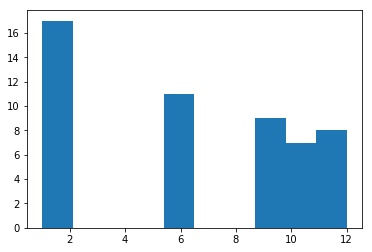

In [89]:
# fig = plt.figure(figsize=(5, 3))
plt.hist(top_dup_payments['AccountingPeriod'])

(array([26.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([52245. , 52472.7, 52700.4, 52928.1, 53155.8, 53383.5, 53611.2,
        53838.9, 54066.6, 54294.3, 54522. ]),
 <a list of 10 Patch objects>)

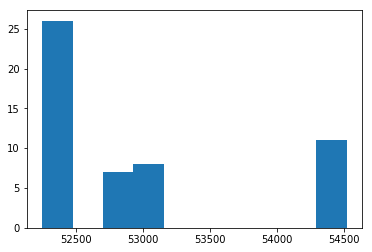

In [90]:
plt.hist(top_dup_payments['Account'])